<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module3/KNN_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets

In [2]:
from datasets import load_dataset

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from tqdm import tqdm

#K-Nearest Neighbors

KNN (also known as Lazy Learning, Memory-Based Learning,...) is one of the most fundamental ML algorithms. It calculates the distance between the input point and all training samples, selects the k closest neighbors, and assigns the most common label among them as the prediction. Some distance metrics used in KNN include:

1. Euclidean Distance (L2 norm)
$$
d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}
$$

2. Chebyshev Distance (L∞ norm)
$$
d(p, q) = \max_{i} |p_i - q_i|
$$

3. Manhattan Distance (L1 norm)
$$
d(p, q) = \sum_{i=1}^{n} |p_i - q_i|
$$

4. Minkowski Distance (Generalized form)
$$
d(p, q) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}}
$$

In this section, we will test KNN using sklearn

##Iris dataset

In [ ]:
# Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, Y_train, y_test = train_test_split(iris_X,
                                                    iris_y,
                                                    test_size=0.2,
                                                    random_state=0)

# Scale the features using StandardScaler (x_scale = (x - mean)/std)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #not fit_transform to ensure the test use the same scale as the train

#Train
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##Diabetes dataset

In [ ]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
diabetes_X,
diabetes_y,
test_size=0.2,
random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predict and Evaluate
y_pred = knn_regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3047.449887640449


##IMDB Dataset

In [7]:
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features = 1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
#Ball Tree is a space-partitioning data structure that organizes data points
#in a hierarchical way for fast nearest neighbor search.
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate
y_pred = np.array([knn_classifier.predict(X_test[i].reshape(1, -1))[0] for i in tqdm(range(len(X_test)), desc="Predicting")])
report = classification_report(y_test, y_pred)
print(report)

Predicting: 100%|██████████| 25000/25000 [21:20<00:00, 19.53it/s]

              precision    recall  f1-score   support

           0       0.61      0.58      0.59     12500
           1       0.60      0.63      0.61     12500

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



#K-Mean

K-Means is an unsupervised clustering algorithm that partitions a dataset into K clusters by minimizing the variance within each cluster:


1.   **Initialize**: Select K random points as initial cluster centroids.
2. **Assign**: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean).
3. **Update**: Compute the mean of all points in each cluster and update the centroids.
4. **Repeat**: Reassign points and update centroids until convergence (i.e., centroids no longer change or a max iteration limit is reached).
5. **Output**: The final K clusters with their centroids

In this section, we will implement KMean

##Load data

In [14]:
iris_dataset = datasets.load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

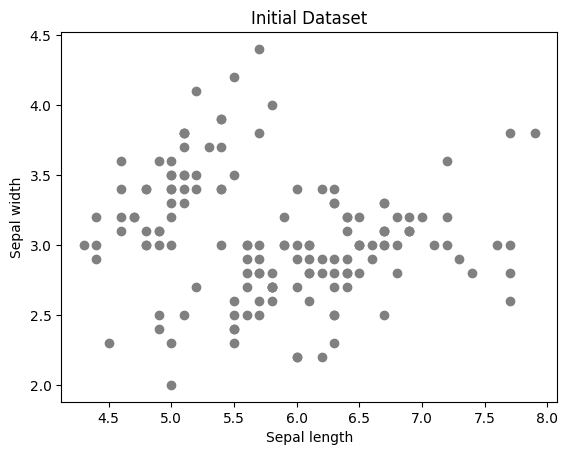

In [15]:
# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

##Implement KMean

In [23]:
class KMeans:
    def __init__(self, k_clusters = 3, max_iter= 100):
        self.k_clusters = k_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
      np.random.seed(42)
      self.centroids = data[np.random.choice(data.shape[0], self.k_clusters, replace=False)]

    def euclidean_distance(self, point, centroid):
      return np.sqrt(np.sum((point - centroid) ** 2))

    def assign_clusters(self, data):
      distances = np.array([[self.euclidean_distance(x, centroid)
                            for centroid in self.centroids] for x in data])
      return np.argmin(distances, axis=1)

    def update_centroids(self, data):
      return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k_clusters)])

    def fit(self, data):
      self.initialize_centroids(data)

      for i in range(self.max_iter):
        self.clusters = self.assign_clusters(data)

        self.plot_clusters(data, i)

        new_centroids = self.update_centroids(data)

        if np.all(self.centroids == new_centroids):
          break

        self.centroids = new_centroids
      self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
      plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis',
                  marker='o', alpha=0.6)
      plt.scatter(self.centroids[:, 0], self.centroids[:, 1],
                  s=300, c='red', marker='x')
      plt.title(f"Iteration {iteration + 1}")
      plt.xlabel('Sepal length')
      plt.ylabel('Sepal width')
      plt.show()

    def plot_final_clusters(self, data):
      plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis',
                  marker='o', alpha=0.6)
      plt.scatter(self.centroids[:, 0], self.centroids[:, 1],
                  s=300, c='red', marker='x')
      plt.title("Final Clusters")
      plt.xlabel('Sepal length')
      plt.ylabel('Sepal width')
      plt.show()

    def predict(self, data):
      return self.assign_clusters(data)

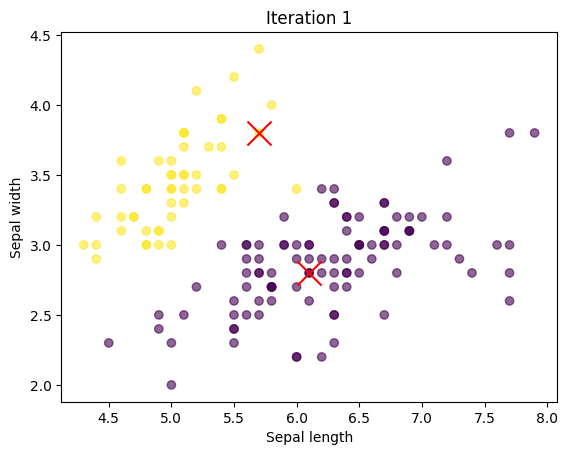

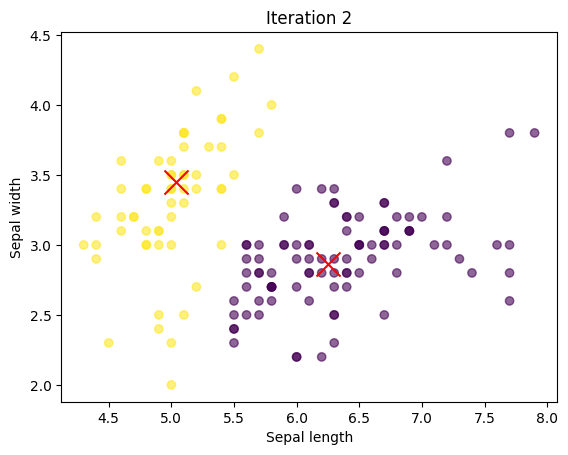

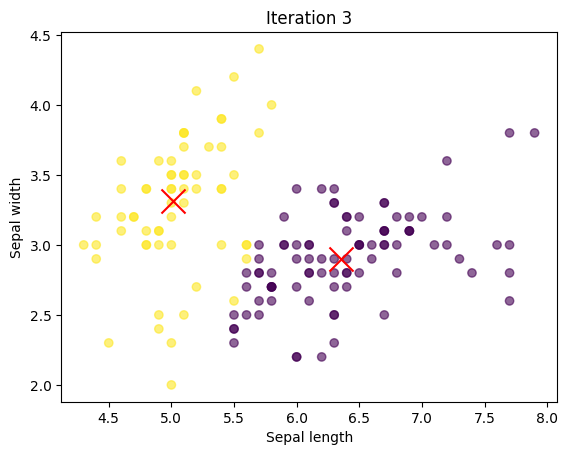

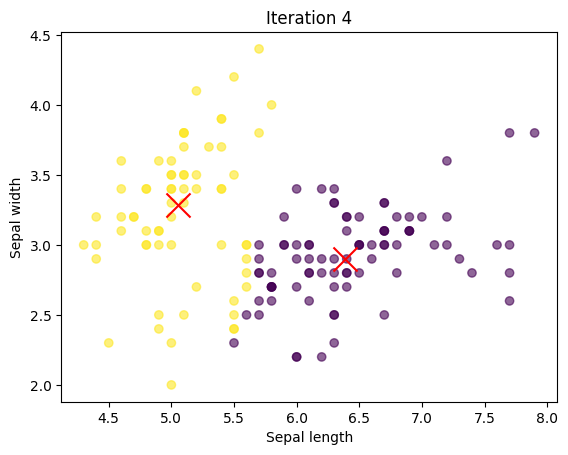

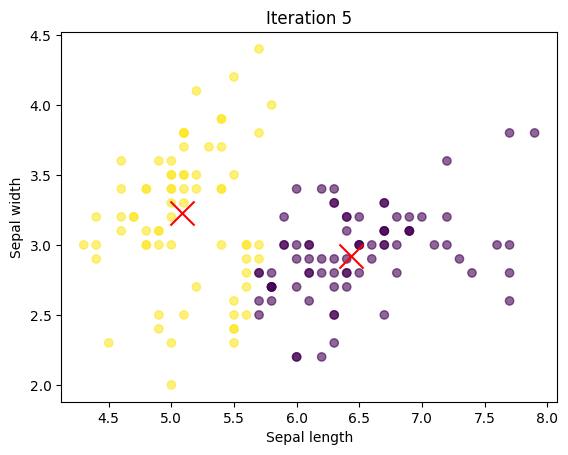

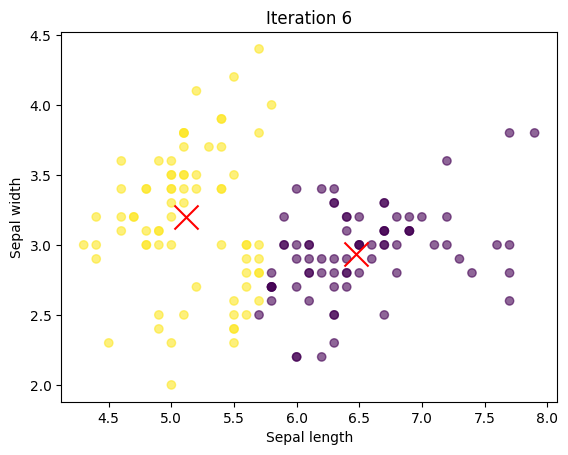

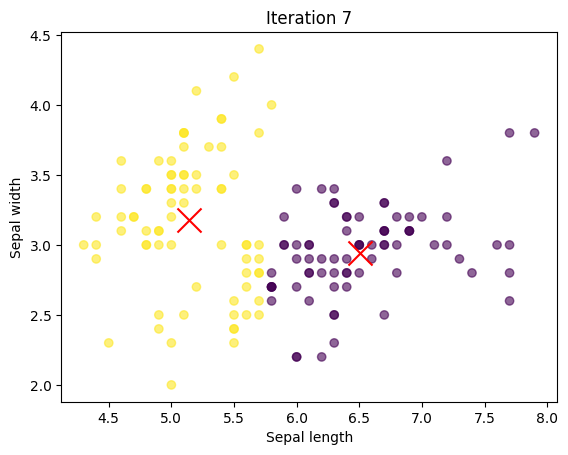

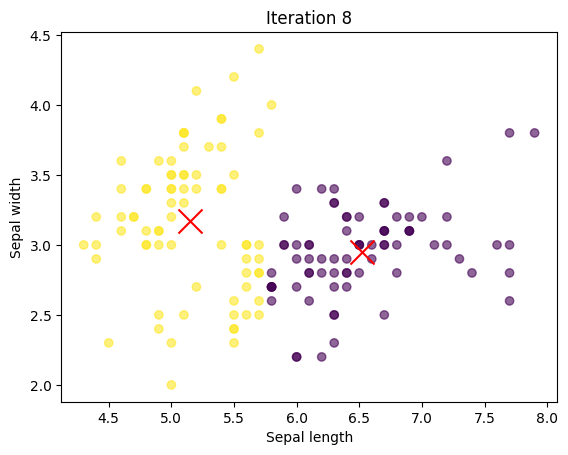

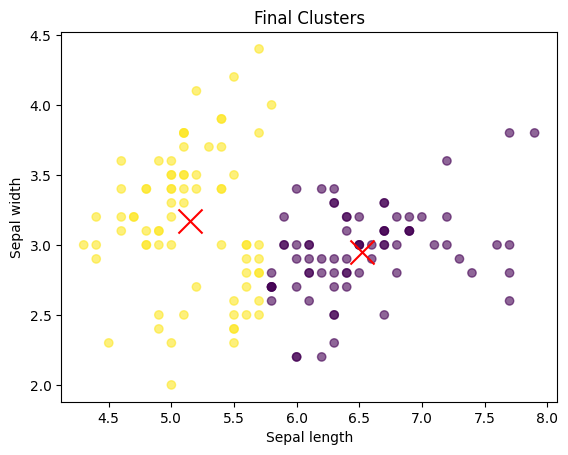

In [22]:
kmeans = KMeans(k_clusters=2)
kmeans.fit(data)

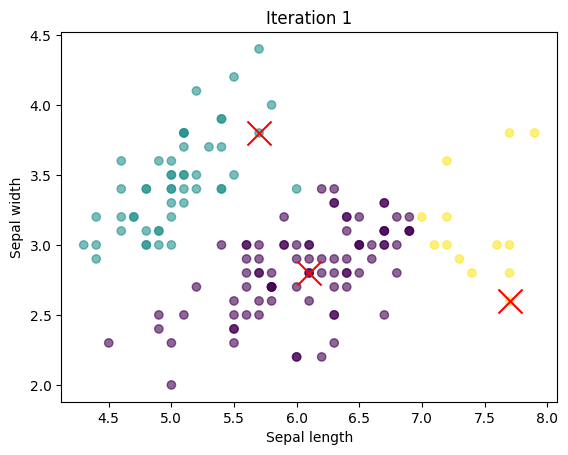

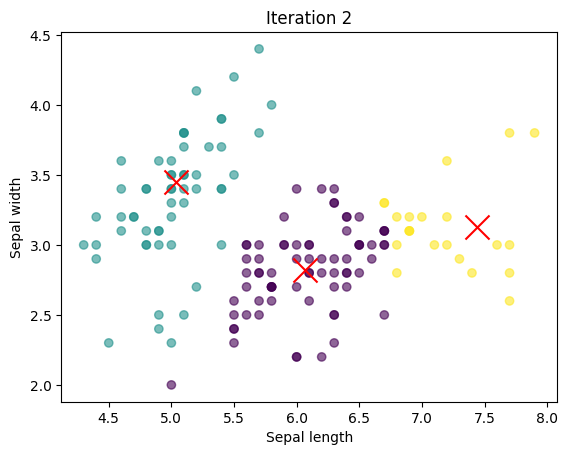

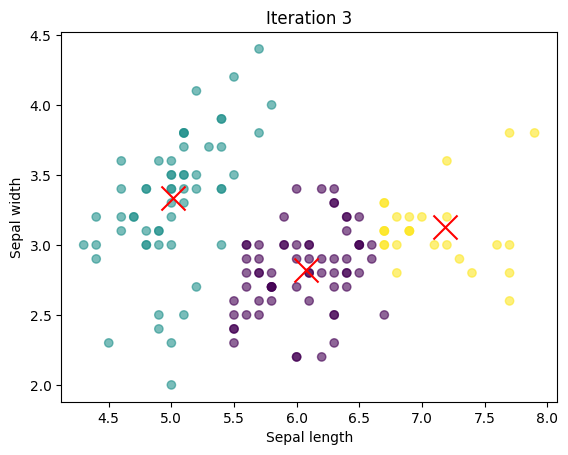

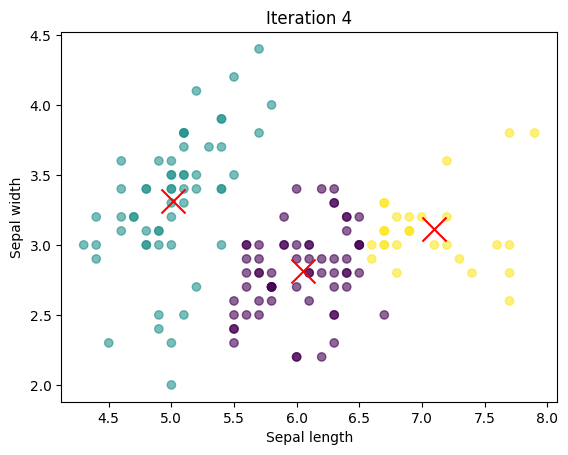

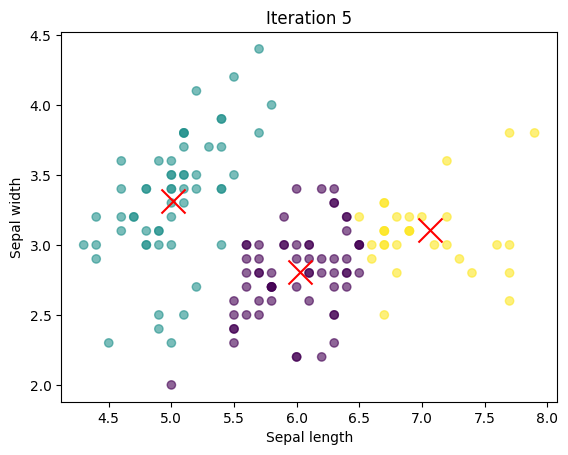

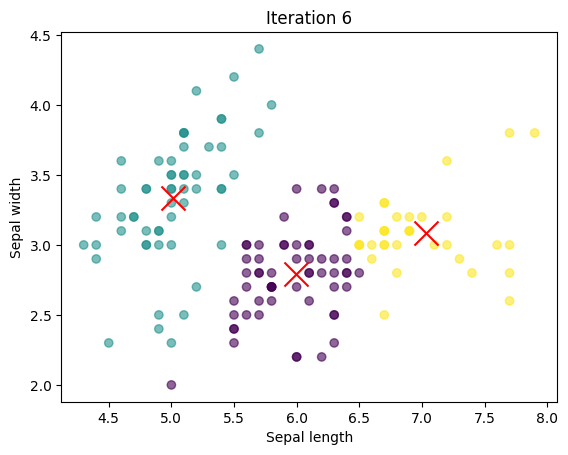

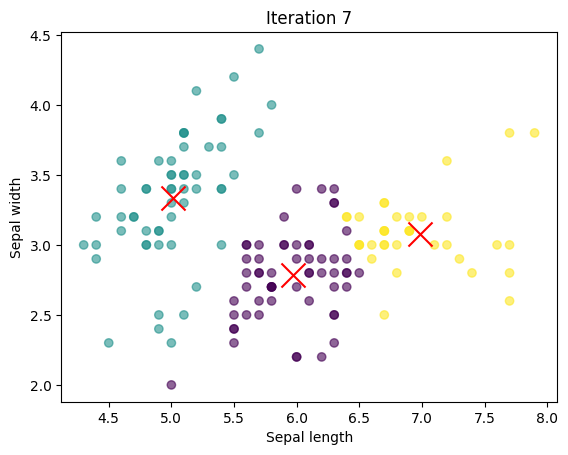

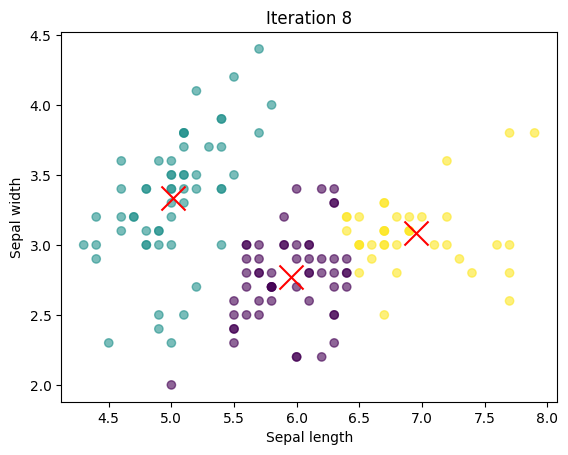

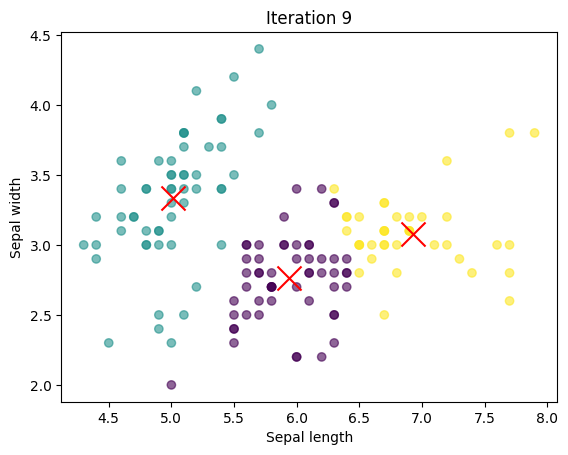

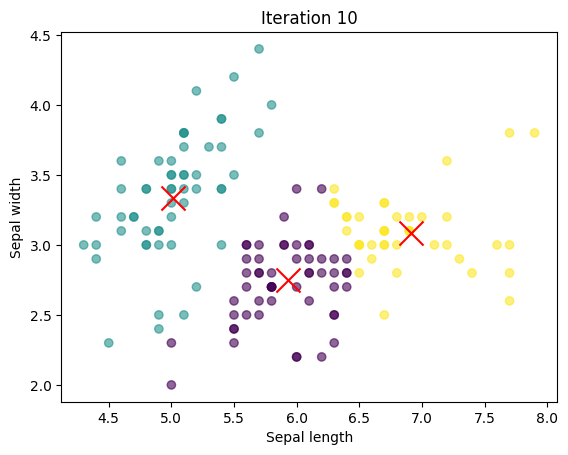

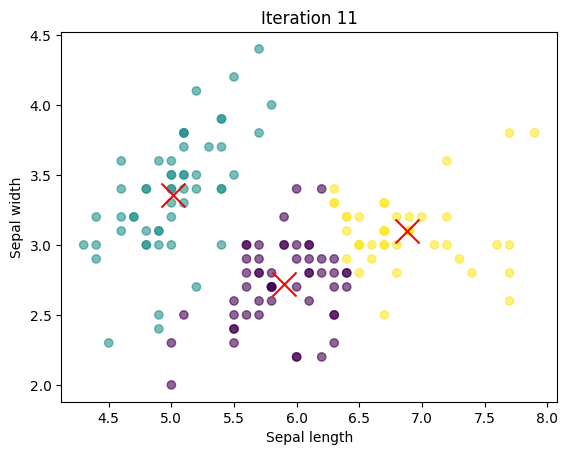

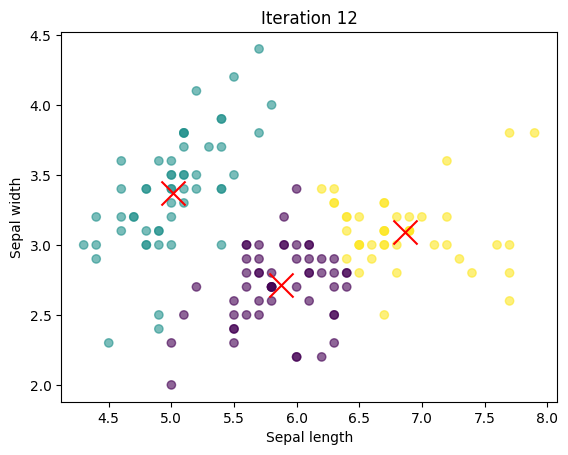

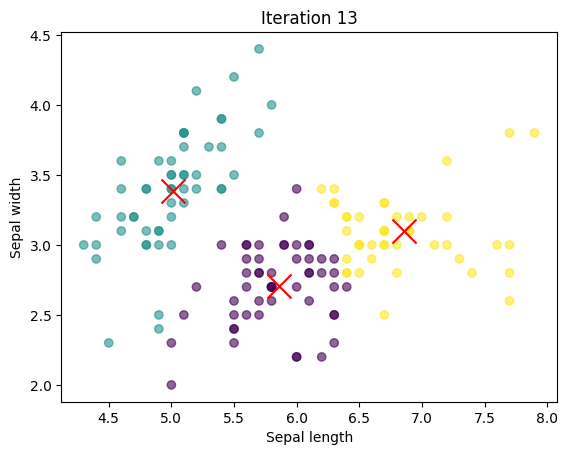

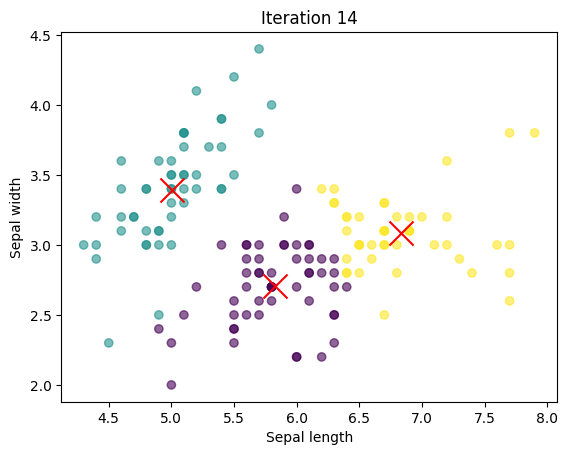

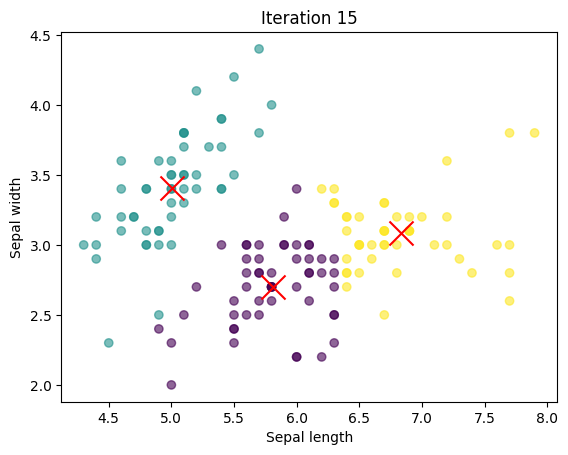

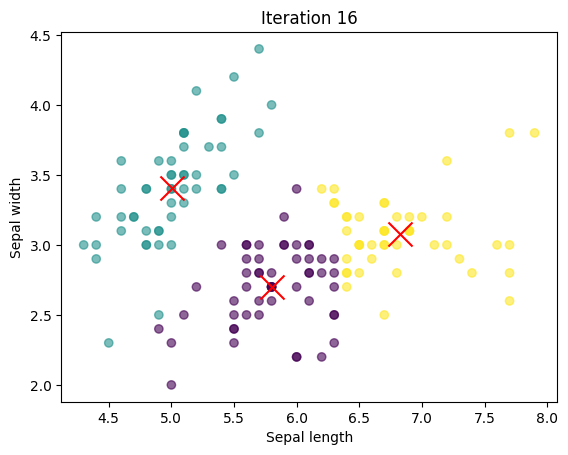

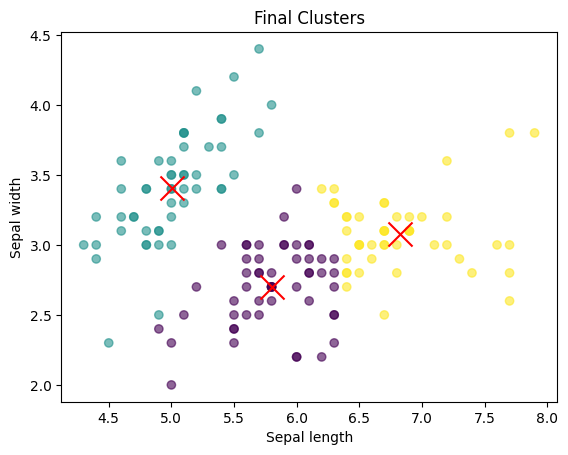

In [25]:
kmeans = KMeans(k_clusters=3)
kmeans.fit(data)

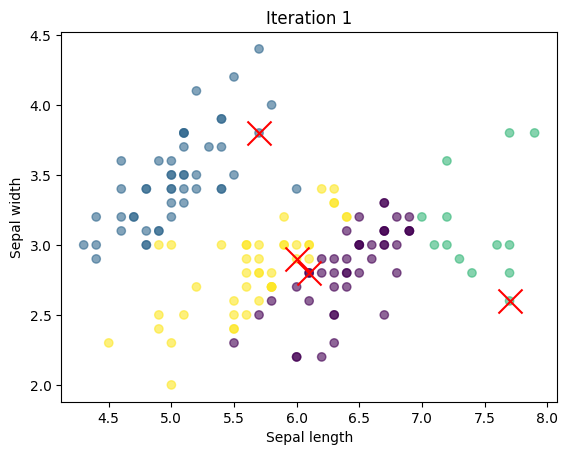

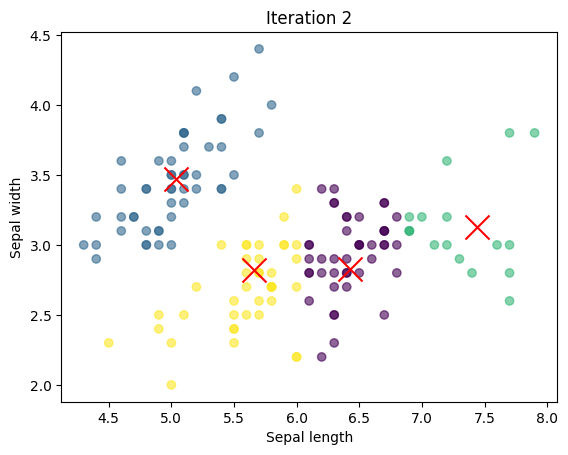

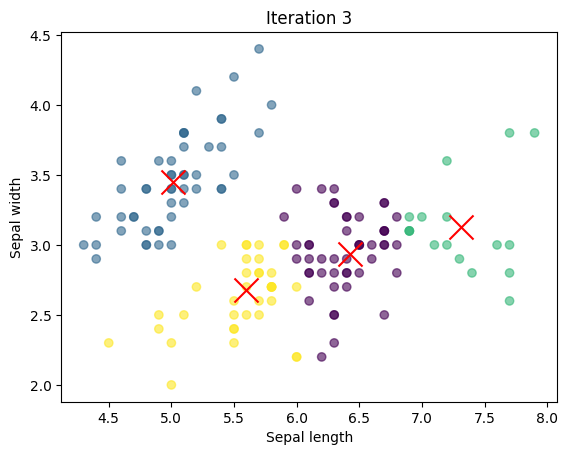

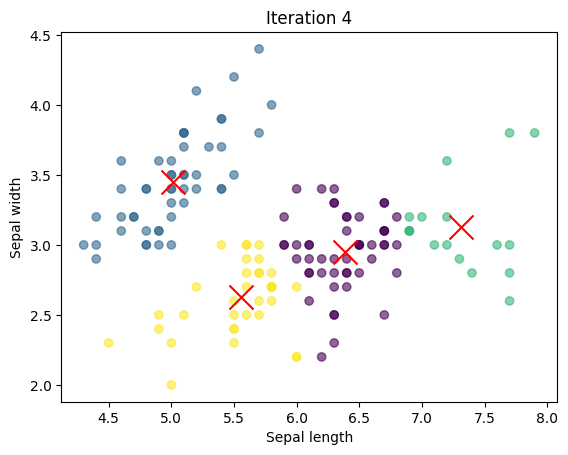

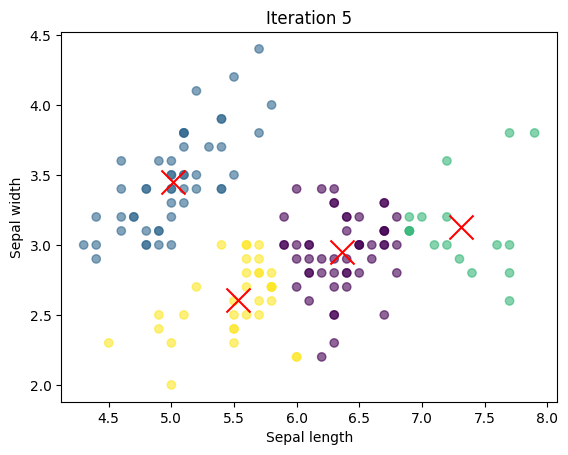

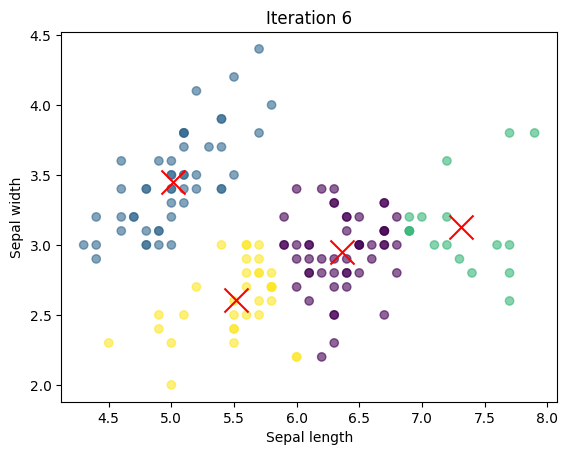

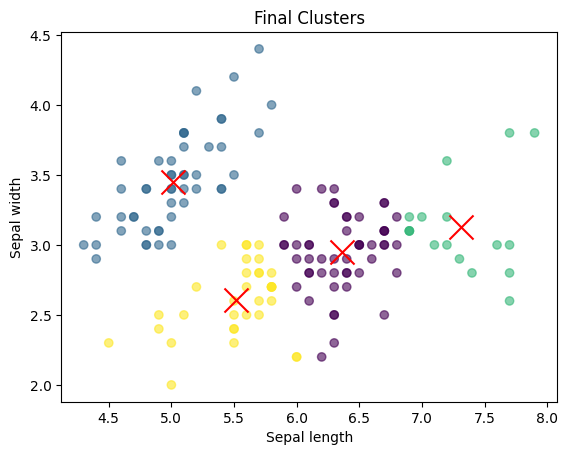

In [26]:
kmeans = KMeans(k_clusters=4)
kmeans.fit(data)